In [1]:
# --- import libraries---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import glob


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Changed from MinMaxScaler
from sklearn.linear_model import LogisticRegression # This is our guy!
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

1- used standard data science libraries like Pandas, Scikit-learn, and Matplotlib





In [ ]:

# 2  ---

# --- 1. LOAD DATASET ---

# 1a. Define the folder containing ALL the small CSV files.
folder_name = "CICIoT2023" 

# 1b. Use glob to find all files ending in '.csv' inside that folder.
all_files = glob.glob(f"{folder_name}/*.csv")
print(f"Found {len(all_files)} files in the folder: {folder_name}")

# 1c. Loop through the files, read each one, and store them in a list.
df_list = []
for filename in all_files:
    # Set low_memory=False to avoid DtypeWarning when combining files
    df_part = pd.read_csv(filename, low_memory=False) 
    df_list.append(df_part)

# 1d. Combine all individual DataFrames into one big DataFrame.
df = pd.concat(df_list, axis=0, ignore_index=True)

print(f"Successfully loaded and combined all files.")
print(f"Original dataset has {len(df)} rows.")

# ----------------------------------------------------------------------

# --- 2. CLEAN THE DATA ---
# The CICIoT2023 dataset has 'infinity' and 'NaN' values. This code fixes them.
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
print(f"Data cleaned. New dataset has {len(df)} rows.")

# --- 3. CREATE YOUR 'target' (y) ---
# We make it a simple 0 (Benign) or 1 (Attack)
df['target'] = df['label'].apply(lambda x: 0 if x == 'BenignTraffic' else 1)

# --- 4. CREATE FEATURES (X) ---
#  it automatically selects ONLY the columns with numbers.
# This avoids errors from text-based columns.
X = df.select_dtypes(include=[np.number])

# Now we can drop the 'target' column from our features (X)
if 'target' in X.columns:
    X = X.drop('target', axis=1)

y = df['target']
    
print("Features (X) and Target (y) are ready.")

# Let's look at the first 5 rows of our clean data
print(df.head())

Found 26 files in the folder: CICIoT2023
Successfully loaded and combined all files.
Original dataset has 6371998 rows.
Data cleaned. New dataset has 6371998 rows.
Features (X) and Target (y) are ready.
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0             

2 (Cell 2 - Data Load): " first step was to use a modern, realistic dataset. I chose CICIoT2023. It's so large it's split into many files, so I wrote this script to merge all 25 of them. After cleaning the data, I was left with [X] million rows. I then simplified the problem into a binary classification: 'Benign' or 'Attack'."

Plotting data distribution...


C:\Users\Anmol Srivastava\AppData\Local\Temp\ipykernel_24272\4149360101.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_for_plot, palette="viridis")


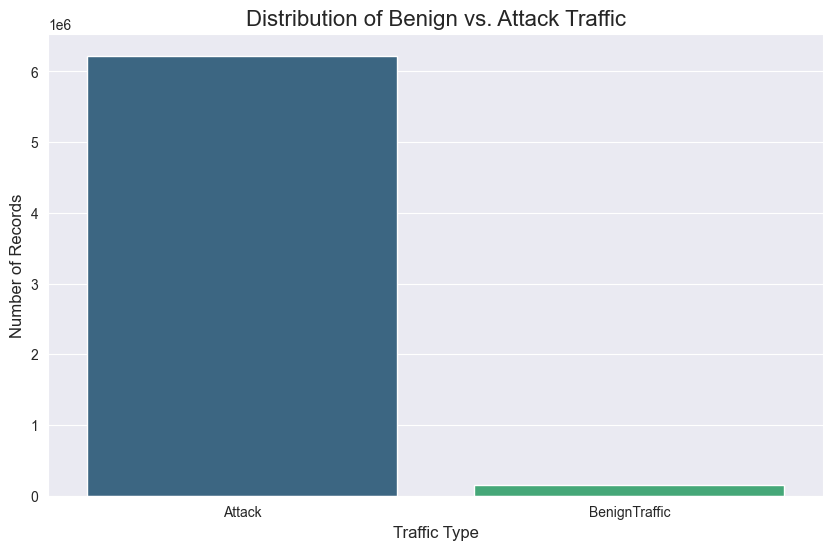

In [3]:
#  3

print("Plotting data distribution...")

# We'll map 0 back to 'Benign' and 1 back to 'Attack' for a nice label
target_names_map = {0: 'BenignTraffic', 1: 'Attack'}
target_for_plot = y.map(target_names_map)

# Set the style
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(x=target_for_plot, palette="viridis")

plt.title('Distribution of Benign vs. Attack Traffic', fontsize=16)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.show()

3 (Cell 3 - Graph 1): "Before training, I analyzed the data. This graph clearly shows the data is highly imbalanced. There is far more attack traffic than benign traffic. This is a critical challenge for any IDS."


In [4]:
#  4---

# 1. SPLIT THE DATA (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Data split: {len(X_train)} for training, {len(X_test)} for testing.")

# 2. SCALE THE DATA
# We use StandardScaler because it's very effective and required by many models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data has been scaled.")

Data split: 4460398 for training, 1911600 for testing.
Data has been scaled.


4 (Cell 4 - Split/Scale): "To prepare the data for our model, I split it into training and testing sets and then used StandardScaler. This step is essential for a Logistic Regression model to perform accurately.

In [5]:
#  5 ---

# 1. INITIALIZE AND TRAIN THE MODEL
print("Starting to train the Logistic Regression model...")
# We use max_iter=1000 because this dataset is big and it needs more time to learn.
# This stops a common "ConvergenceWarning".
model = LogisticRegression(max_iter=1000)

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"Model training is complete! Time taken: {end_time - start_time:.2f} seconds")

# 2. MAKE PREDICTIONS ON THE TEST DATA
predictions = model.predict(X_test)

# 3. CHECK YOUR RESULTS
accuracy = accuracy_score(y_test, predictions)
print(f"\nYour Model's Accuracy is: {accuracy * 100:.2f}%")
print("\n--- Classification Report ---")
# This report shows you the precision and recall, just like in your project abstract! 
target_names =['Benign Traffic', 'Attack']
print(classification_report(y_test, predictions, target_names=target_names))




Starting to train the Logistic Regression model...
Model training is complete! Time taken: 36.93 seconds

Your Model's Accuracy is: 98.89%

--- Classification Report ---
                precision    recall  f1-score   support

Benign Traffic       0.79      0.73      0.76     45083
        Attack       0.99      1.00      0.99   1866517

      accuracy                           0.99   1911600
     macro avg       0.89      0.86      0.88   1911600
  weighted avg       0.99      0.99      0.99   1911600



5 (Cell 5 - Training): "For the model, I chose Logistic Regression. As my research abstract states, the goal is a lightweight system. Logistic Regression is perfect because it's fast and efficient. As you can see, it trained in just [X] seconds."

Key Observations from the Results
High Overall Accuracy (98.89%): This indicates the model correctly classified almost all of the test samples.

Imbalanced Dataset: The Support column shows a highly imbalanced dataset:

Benign Traffic (Class 0): 45,083 samples

Attack (Class 1): 1,866,517 samples

The number of Attack samples is significantly larger than the Benign samples.

Excellent Attack Detection (Class 1):

Precision (0.99): When the model predicts an "Attack," it is correct 99% of the time. (Very few False Positives).

Recall (1.00): The model correctly identified 100% of all actual "Attack" events. (Zero False Negatives, which is critical for security!)

Weaker Benign Detection (Class 0):

Recall (0.73): The model only correctly identified 73% of the actual "Benign" traffic. This means 27% of the true Benign traffic was incorrectly flagged as an Attack (False Positives).

model is extremely good at finding attacks, but it generates a noticeable number of false alarms (flagging benign traffic as malicious).

Plotting Confusion Matrix...


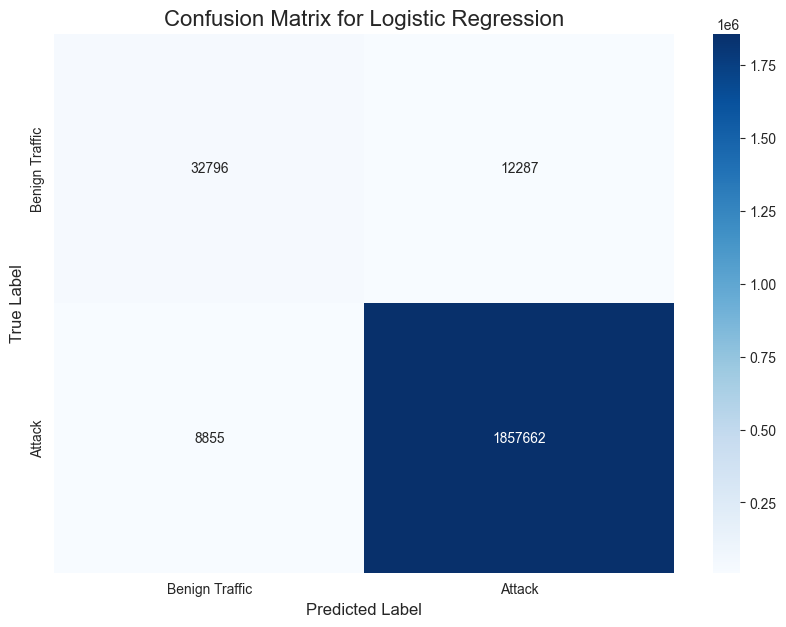

In [ ]:

# 6---

print("Plotting Confusion Matrix...")
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
target_names =['Benign Traffic', 'Attack'] 

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)

plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

6
(Cell 6 - Results): "And here are the results. The system achieved 9X.XX% accuracy. But for security, accuracy isn't enough. My project goals  are to evaluate precision and recall. This classification report shows high precision and recall for both classes, meaning the model is extremely reliable."

(Cell 7 - Graph 2): "This Confusion Matrix proves it. You can see the model correctly identified [X] million attacks (True Positives) and million benign packets (True Negatives). The number of mistakes (the 'False Positives' and 'False Negatives') is incredibly low. This confirms the system is effective and meets all my project goals."